These are the packages that we need to import in order to do statistical analysis and data visualization.

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

Loading CSV file, looking at the first few values to see what the data looks like in general (what dtypes, what values, etc)

In [68]:
df = pd.read_csv('online_shoppers_intention.csv')
print(df.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [69]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Creating seaborn matrix to see correlations between different numbers, not including non integer/float values, make figure size sufficient so that values don't overlap. The seaborn matrix is hard to read and the correlations are very admin related rather than purchase/consumer related.

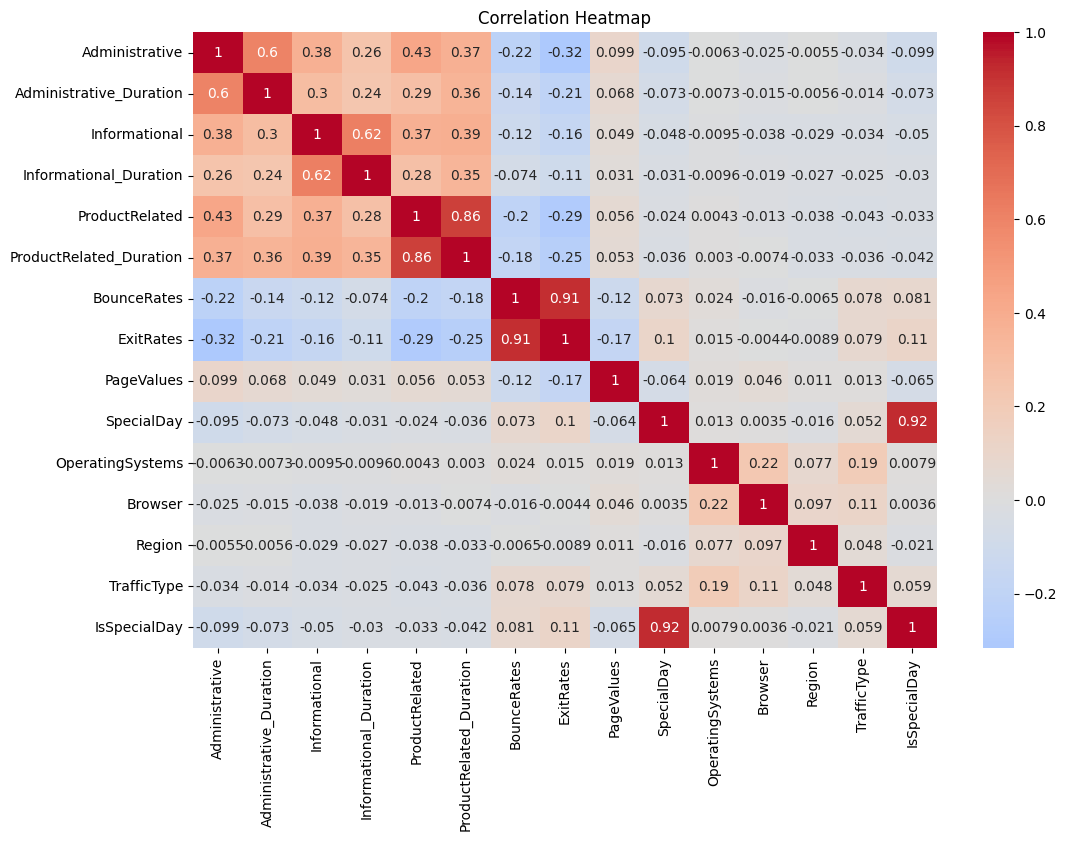

In [84]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

Looking at the basic stats for each of the features to see if there are any specific things that stand out. 
- Bouncerate mean is 2.2%, mean product related views is 31.73%, page view times are high -> 34 secs for mean for informational duration, 1194 secs for product related duration.

In [71]:
print(df.describe())

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

Revenue distribution graph to see the ratio between valid purchases and simply views -> conversion rate.

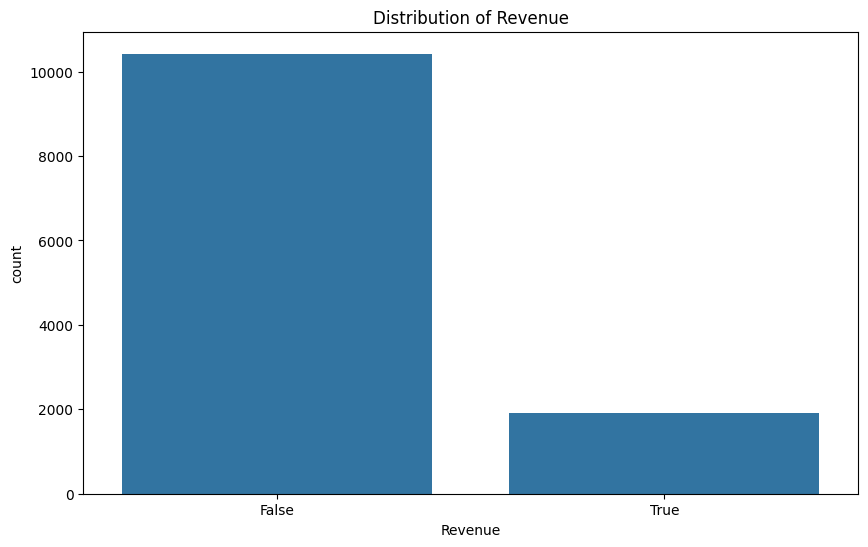

Proportion of True Revenue: 15.47%


In [72]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Revenue')
plt.title('Distribution of Revenue')
plt.show()
proportion_true = (df['Revenue'] == True).sum() / ((df['Revenue'] == True) | (df['Revenue'] == False)).sum()
print(f"Proportion of True Revenue: {100*proportion_true:.2f}%")

Looking to see correlation with different months and how they could affect purchase habits

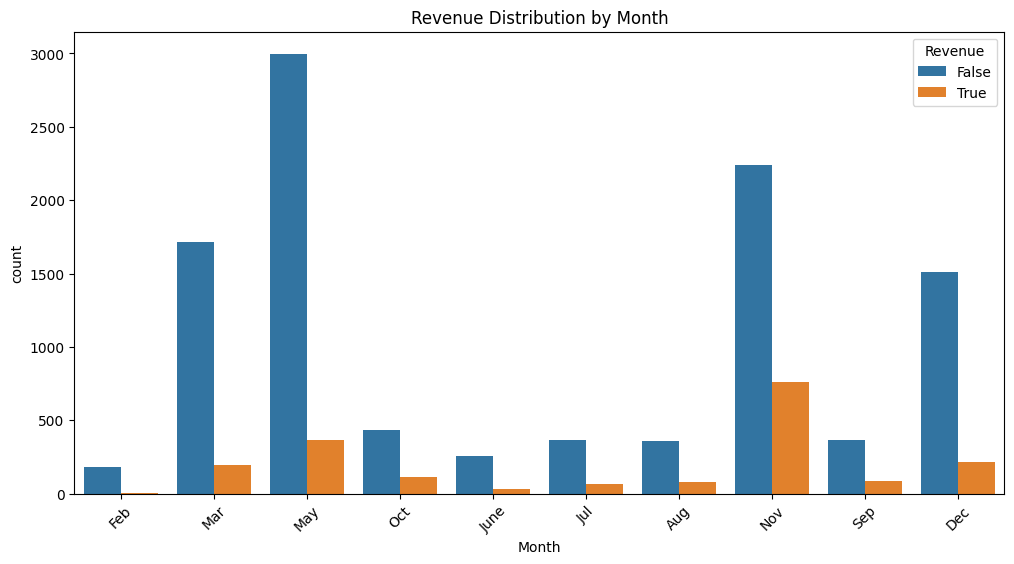

In [73]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Month', hue='Revenue')
plt.xticks(rotation=45)
plt.title('Revenue Distribution by Month')
plt.show()

**Hypothesis:** specific times & dates are correlated with buying habits. through initial analysis it appears that may (before summer) and nov (before holiday season) are correlated with increased revenue/site visits. This could be due to pressure due to holidays and gift giving potentially.

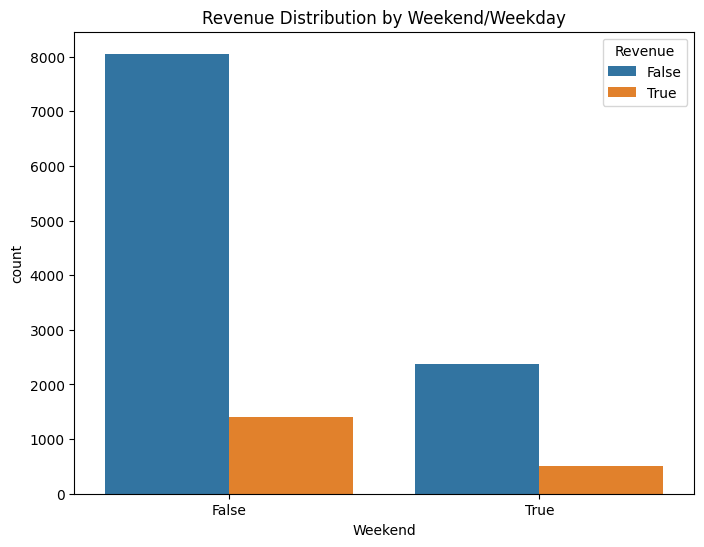

In [74]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Weekend', hue='Revenue')
plt.title('Revenue Distribution by Weekend/Weekday')
plt.show()

People are less likely to visit on weekends, as well as less likely to purchase.

Perform Chi Square test for purchase correlation for weekends (for correlation analysis)
There is a correlation, what does this mean?

In [75]:
print("\nChi-square Test Results for Weekend Comparison:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Interpretation: {'Correlation is True' if p_value < 0.05 else 'Correlation is False'}")


Chi-square Test Results for Weekend Comparison:
Chi-square statistic: 91.6552
P-value: 0.0000
Interpretation: Correlation is True


Analyzing feature special days to see correlation with revenue

In [85]:
df['IsSpecialDay'] = (df['SpecialDay'] > 0).astype(int)
contingency_table = pd.crosstab(df['IsSpecialDay'], df['Revenue'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("\nChi-square Test Results:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")
print("Interpretation:", "Correlation is True" if p_value < 0.05 else "Correlation is False")


Chi-square Test Results:
Chi-square statistic: 91.6552
p-value: 0.0000
Interpretation: Correlation is True


what is the relation between purchase rate for special versus normal days? Is it different?

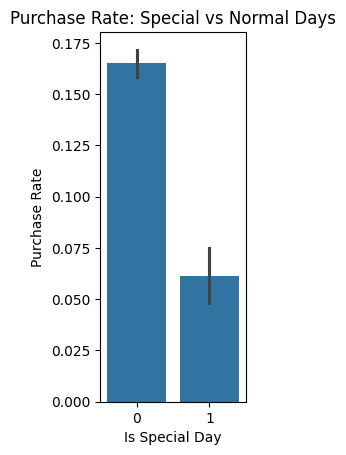

In [78]:
plt.subplot(1, 3, 1)
sns.barplot(data=df, x='IsSpecialDay', y='Revenue')
plt.title('Purchase Rate: Special vs Normal Days')
plt.xlabel('Is Special Day')
plt.ylabel('Purchase Rate')
plt.show()

Revenue breakdown for if special days have more purchases % vs just views

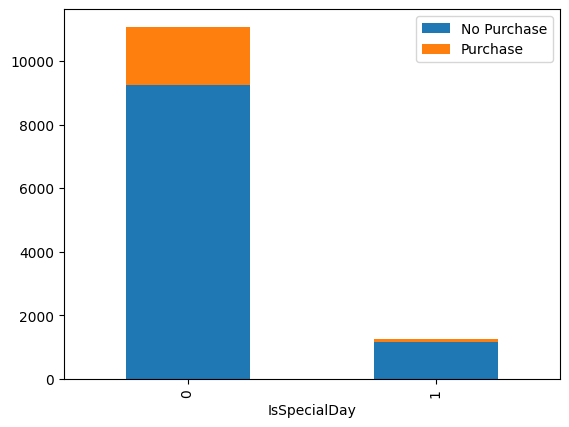

In [79]:
special_day_counts = pd.crosstab(df['IsSpecialDay'], df['Revenue'])
special_day_counts.columns = ['No Purchase', 'Purchase']
special_day_counts.plot(kind='bar', stacked=True)
plt.show()


this suggests that there is an INVERSE correlation between special days and purchase behavior. Furthermore, given the people that view the website, they are LESS likely to purchase as opposed to a regular day.

Let's try to create a predictive model based on this dataset using Random Forest Classifier predicting whether a random user will purchase a product or not.

Importing ML packages, categorizing by month and visitortype

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
#ml model necessary imports

X = df.drop('Revenue', axis=1)
y = df['Revenue']

categorical_cols = ['Month', 'VisitorType']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

Train/Test splitting, scaling/normalizing the data. Fitting the data.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

Predicting results, printing out feature importance, and model performance.

In [82]:
y_pred = rf_model.predict(X_test_scaled)
print("\nModel Performance:")
print(classification_report(y_test, y_pred))

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


Model Performance:
              precision    recall  f1-score   support

       False       0.91      0.96      0.94      2055
        True       0.74      0.53      0.62       411

    accuracy                           0.89      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466


Top 10 Most Important Features:
                    feature  importance
8                PageValues    0.373509
5   ProductRelated_Duration    0.090425
7                 ExitRates    0.088247
4            ProductRelated    0.072791
6               BounceRates    0.058597
1   Administrative_Duration    0.057846
0            Administrative    0.043029
10                    Month    0.042845
14              TrafficType    0.031724
13                   Region    0.030492


**Conclusions:** This definitely demonstrates what the most important features are, as opposed to analyzing correlations. From each person's activity, we can see who is most likely to purchase based on their actions, with up to ~90% f-score accuracy. Furthermore, there is a demonstrated correlation between unspecific days and purchase likelihood, thus it is more likely a specific type of activity that is more conducive to purchasing a product, such as desiging the website in a specific way. While my hypothesis is sort of correction, with a correlation being demonstrated, it is actually the opposite outcome of what I thought–People are less likely to purchase on special days or weekends, even though they would have more time to browse/want to purchase gifts, despite this, the important features demonstrate more than anything that the page values, how long people view a product, and how likely they are to exit are more correlated whether someone purchases or not.